In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import random

word_list = [
    'apple', 'banana', 'orange', 'grape', 'watermelon', 'melon', 'strawberry',
    'pear', 'lime', 'pineapple', 'mango', 'cherry', 'blueberry', 'raspberry',
    'peach', 'plum', 'apricot', 'lemon', 'lime','lime', 'pomegranate','lime',
    'apple', 'banana', 'orange', 'grape', 'watermelon', 'melon', 'strawberry',
    'pear', 'kiwi', 'pineapple', 'mango', 'cherry', 'blueberry', 'raspberry',
    'peach', 'plum',  'lemon', 'lime',  'pomegranate',
    'apple', 'banana', 'orange', 'grape', 'watermelon', 'melon', 'strawberry',
    'pear', 'kiwi', 'pineapple', 'mango', 'cherry', 'blueberry', 'raspberry',
    'peach', 'plum', 'apricot', 'lemon', 'lime', 'fig', 'pomegranate',
    'apple', 'banana', 'orange','watermelon', 'mango', 'mango','mango', 'apple',
    'apple','apple','apple','apple','apple','apple','cherry','cherry',
    'pineapple', 'mango', 'cherry','pineapple', 'mango', 'cherry',
    'pineapple', 'mango', 'cherry','grape','grape','grape','grape','pear'
    ,'lime', 'pear','watermelon','pineapple', 'lemon','lemon','lemon'
]

word_counts = Counter(word_list)

# # 단어 빈도수 계산 또 다른 방법
# word_counts = {}
# for word in word_list:
#     if word in word_counts:
#         word_counts[word] += 1
#     else:
#         word_counts[word] = 1

# 단어와 색상 정보 딕셔너리
word_colors = {
    'apple': 'red',
    'banana': 'yellow',
    'orange': 'orange',
    'grape': 'purple',
    'watermelon': 'green',
    'melon': 'green',
    'strawberry': 'red',
    'pear': 'green',
    'lime': 'green',
    'pineapple': 'yellow',
    'mango': 'orange',
    'cherry': 'red',
    'blueberry': 'blue',
    'raspberry': 'red',
    'peach': 'orange',
    'plum': 'purple',
    'apricot': 'orange',
    'lemon': 'yellow',
    'fig': 'purple',
    'pomegranate': 'red',
    'kiwi' :'green'
}

NameError: ignored

In [ ]:
# 워드 클라우드 생성
wordcloud = WordCloud(width=800, height=400, max_font_size=150, background_color='white').generate_from_frequencies(word_counts)

# 워드 클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

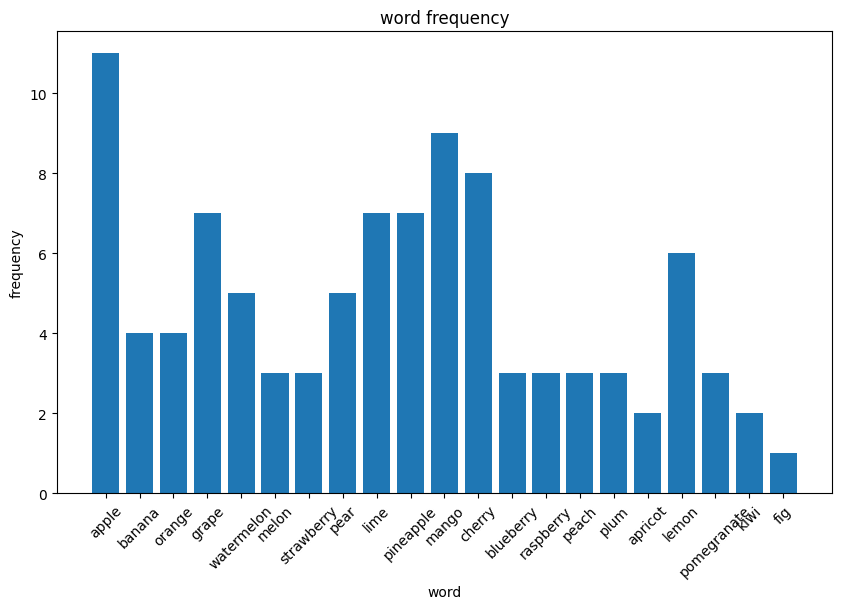

In [ ]:
# 단어와 빈도수를 리스트로 분리
words = list(word_counts.keys())
counts = list(word_counts.values())

# 막대 그래프 시각화
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xlabel('word')
plt.ylabel('frequency')
plt.title('word frequency')
plt.xticks(rotation=45)
plt.show()

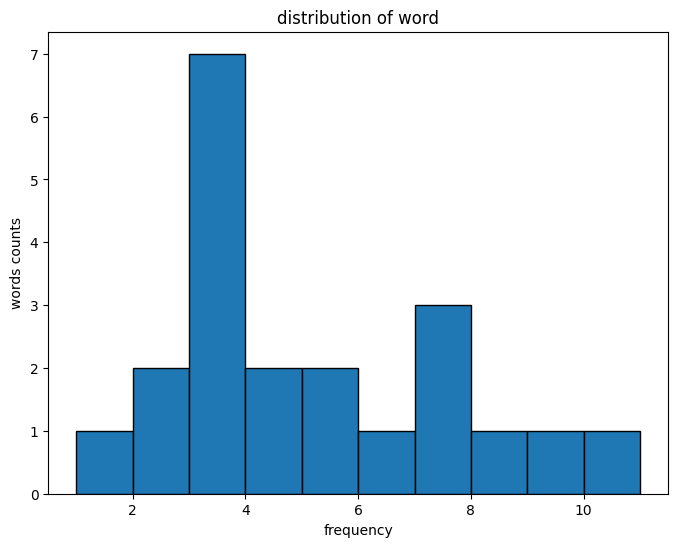

In [ ]:
# 단어의 빈도수 리스트
counts = list(word_counts.values())

# 히스토그램 시각화
plt.figure(figsize=(8, 6))
plt.hist(counts, bins=10, edgecolor='black')
plt.xlabel('frequency')
plt.ylabel('words counts')
plt.title('distribution of word')
plt.show()

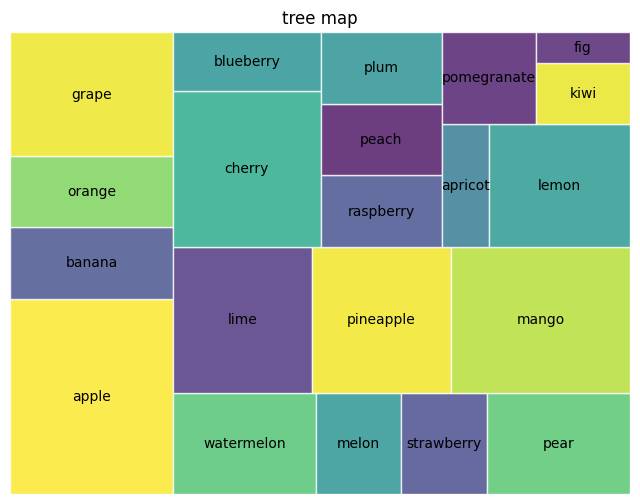

In [ ]:
import matplotlib.pyplot as plt
import squarify

# 단어와 빈도수 리스트
words = list(word_counts.keys())
counts = list(word_counts.values())

# 트리맵 시각화
plt.figure(figsize=(8, 6))
squarify.plot(sizes=counts, label=words,  alpha=0.8, linewidth=1, edgecolor='white')
plt.title('tree map')
plt.axis('off')
plt.show()

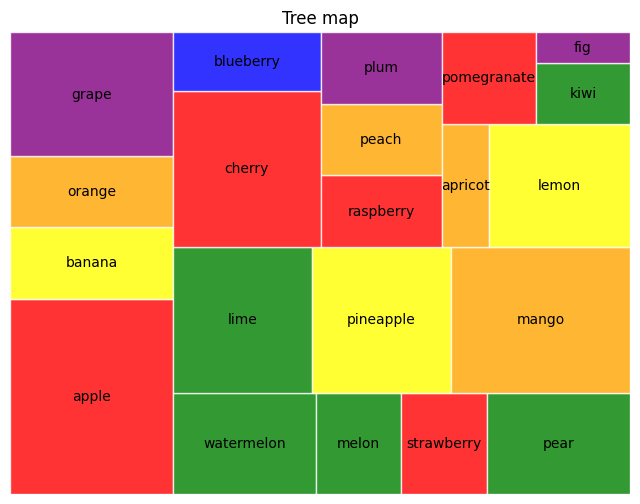

In [ ]:
import matplotlib.pyplot as plt
import squarify

# 단어와 빈도수 리스트
words = list(word_counts.keys())
counts = list(word_counts.values())

# 트리맵 색상 리스트
colors = [word_colors.get(word, 'gray') for word in words]

# 트리맵 각 과일 색상에 맞는 색상으로 시각화
plt.figure(figsize=(8, 6))
squarify.plot(sizes=counts, label=words, color=colors, alpha=0.8, linewidth=1, edgecolor='white')
plt.title('Tree map')
plt.axis('off')
plt.show()

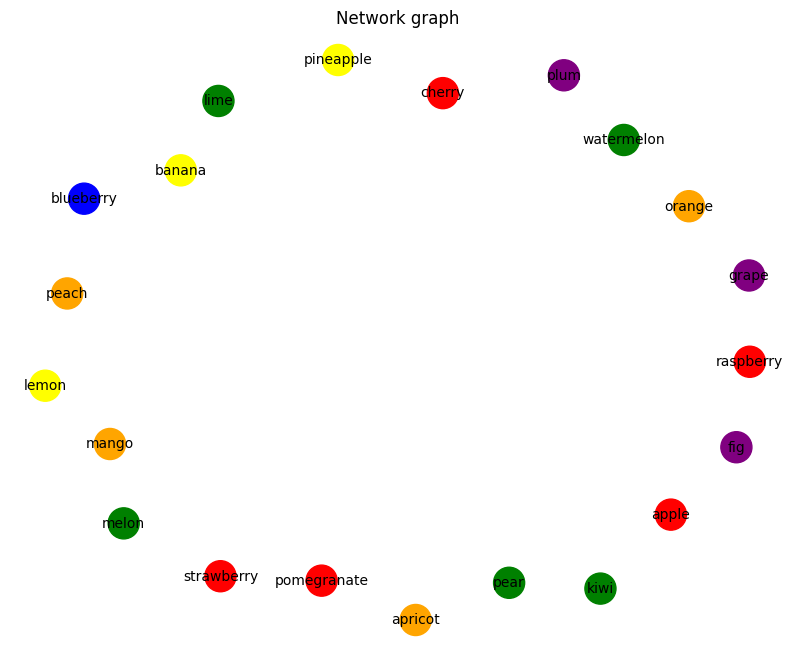

In [ ]:
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

word_counts = Counter(word_list)

# 그래프 생성
G = nx.Graph()

# 단어와 빈도수, 색상 추가
for word, count in word_counts.items():
    G.add_node(word, count=count, color=word_colors[word])

# 그래프 시각화
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5)
node_colors = [G.nodes[n]['color'] for n in G.nodes()]
nx.draw_networkx(G, pos, with_labels=True, node_size=500, font_size=10, node_color=node_colors)
plt.title('Network graph')
plt.axis('off')
plt.show()

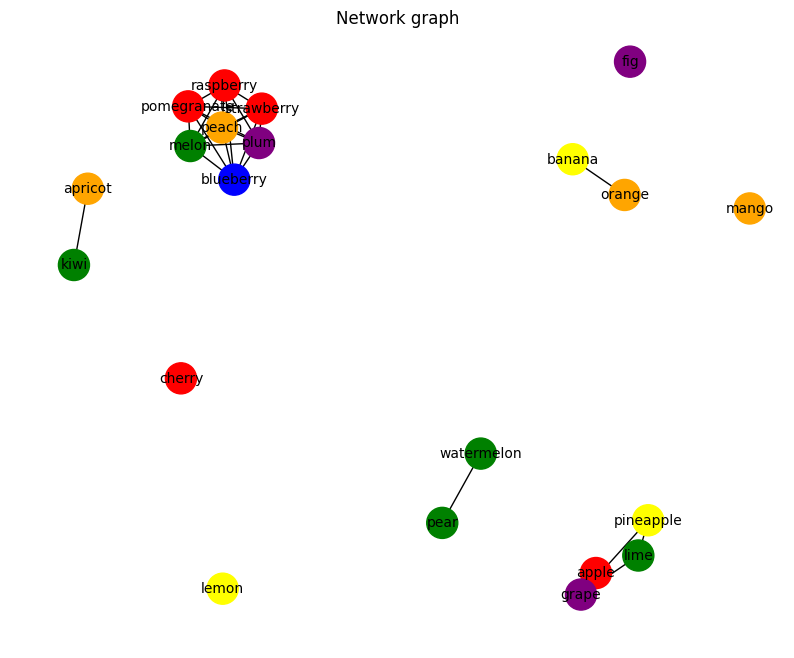

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 그래프 생성
G = nx.Graph()

# 단어와 빈도수, 색상 추가
for word, count in word_counts.items():
    G.add_node(word, count=count, color=word_colors[word])

# 단어간의 연결 생성
for word1, count1 in word_counts.items():
    for word2, count2 in word_counts.items():
        if word1 != word2 and count1 == count2:
            G.add_edge(word1, word2)

# 그래프 시각화
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5)
node_colors = [G.nodes[n]['color'] for n in G.nodes()]
nx.draw_networkx(G, pos, with_labels=True, node_size=500, font_size=10, node_color=node_colors)
plt.title('Network graph')
plt.axis('off')
plt.show()

In [ ]:
from collections import defaultdict

# 색상을 기준으로 단어들을 묶는 딕셔너리 생성
color_groups = defaultdict(list)
for word, color in word_colors.items():
    color_groups[color].append(word)

# 색상별로 단어들을 출력
for color, words in color_groups.items():
    print(f'{color}: {words}')

red: ['apple', 'strawberry', 'cherry', 'raspberry', 'pomegranate']
yellow: ['banana', 'pineapple', 'lemon']
orange: ['orange', 'mango', 'peach', 'apricot']
purple: ['grape', 'plum', 'fig']
green: ['watermelon', 'melon', 'pear', 'lime', 'kiwi']
blue: ['blueberry']


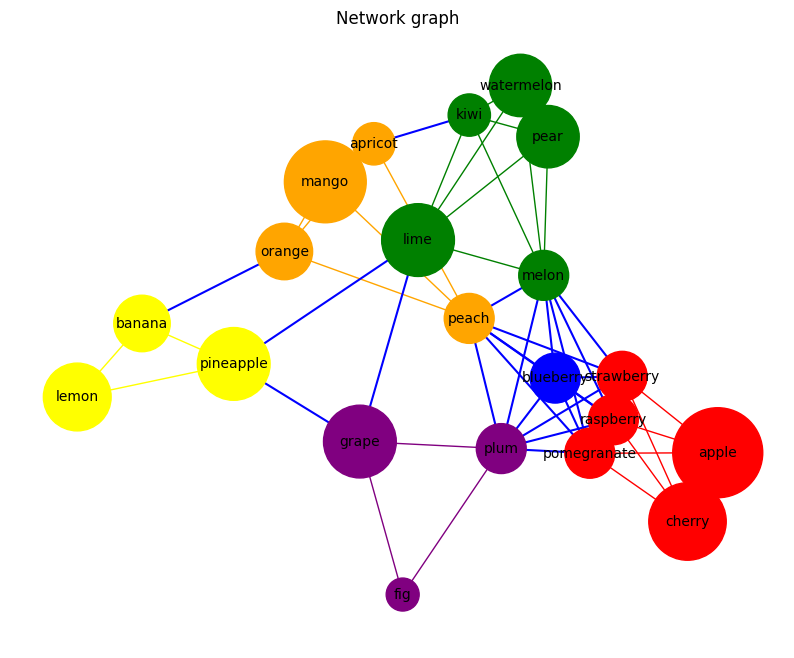

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 그래프 생성
G = nx.Graph()

# 단어와 빈도수, 색상 추가
for word, count in word_counts.items():
    G.add_node(word, count=count, color=word_colors[word])

# 단어간의 연결 생성
for word1, count1 in word_counts.items():
    for word2, count2 in word_counts.items():
        if word1 != word2:
            if count1 == count2:
                G.add_edge(word1, word2, color='blue')  # 같은 빈도로 나타나는 단어는 푸른 선으로 연결
            elif word_colors[word1] == word_colors[word2]:
                G.add_edge(word1, word2, color=word_colors[word1])  # 같은 색상의 단어들은 해당 색상의 선으로 연결

# 그래프 시각화
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5)

# 엣지 색상과 두께 정보 추출
edge_colors = [G.edges[e]['color'] for e in G.edges()]
edge_widths = [1.5 if color == 'blue' else 1 for color in edge_colors]  # 같은 빈도로 연결된 선은 두께를 키움

# 노드 크기 조정
node_sizes = [G.nodes[n]['count'] for n in G.nodes()]
min_node_size = min(node_sizes)
max_node_size = max(node_sizes)
adjusted_node_sizes = [(size / max_node_size) * 4000 + 200 for size in node_sizes]  # 원 크기를 조정하여 글자를 넘지 않도록 함

# 그래프 그리기
nx.draw_networkx(G, pos, with_labels=True, node_size=adjusted_node_sizes, font_size=10,
                 node_color=node_colors, edge_color=edge_colors, width=edge_widths)
plt.title('Network graph')
plt.axis('off')
plt.show()

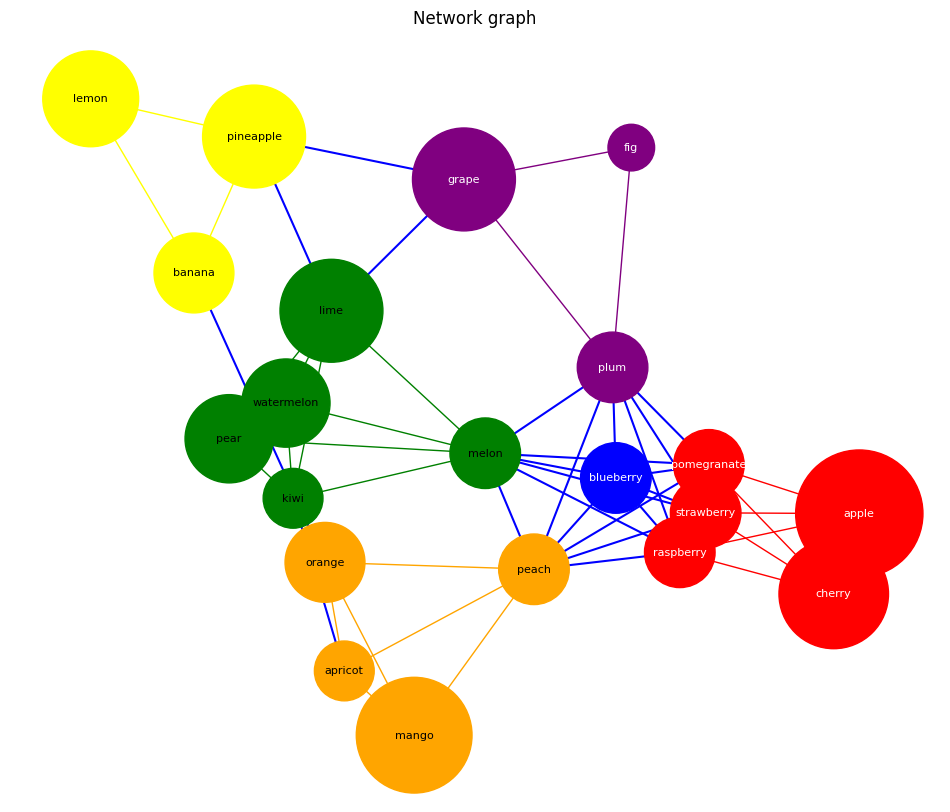

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 그래프 생성
G = nx.Graph()

# 단어와 빈도수, 색상 추가
for word, count in word_counts.items():
    G.add_node(word, count=count, color=word_colors[word])

# 단어간의 연결 생성
for word1, count1 in word_counts.items():
    for word2, count2 in word_counts.items():
        if word1 != word2:
            if count1 == count2:
                G.add_edge(word1, word2, color='blue')  # 같은 빈도로 나타나는 단어는 푸른 선으로 연결
            elif word_colors[word1] == word_colors[word2]:
                G.add_edge(word1, word2, color=word_colors[word1])  # 같은 색상의 단어들은 해당 색상의 선으로 연결

# 그래프 시각화
plt.figure(figsize=(12, 10))  # 이미지 크기 비율을 조정하여 더 넓은 공간 확보
pos = nx.spring_layout(G, k=0.5)

# 엣지 색상과 두께 정보 추출
edge_colors = [G.edges[e]['color'] for e in G.edges()]
edge_widths = [1.5 if color == 'blue' else 1 for color in edge_colors]  # 같은 빈도로 연결된 선은 두께를 키움

# 노드 크기 조정
node_sizes = [G.nodes[n]['count'] for n in G.nodes()]
min_node_size = min(node_sizes)
max_node_size = max(node_sizes)
adjusted_node_sizes = [(size / max_node_size) * 8000 + 400 for size in node_sizes]  # 원 크기를 조정하여 글자를 넘지 않도록 함

# 그래프 그리기
nx.draw_networkx(G, pos, with_labels=False, node_size=adjusted_node_sizes, font_size=0,
                 node_color=node_colors, edge_color=edge_colors, width=edge_widths)

# 노드의 글자 색상 설정 및 위치 조정
for node, color in word_colors.items():
    text_color = 'white' if color in ['purple', 'red', 'blue', 'black'] else 'black'
    text_x, text_y = pos[node]
    plt.text(text_x, text_y, node, color=text_color, fontsize=8, horizontalalignment='center', verticalalignment='center')

plt.title('Network graph')
plt.axis('off')
plt.show()

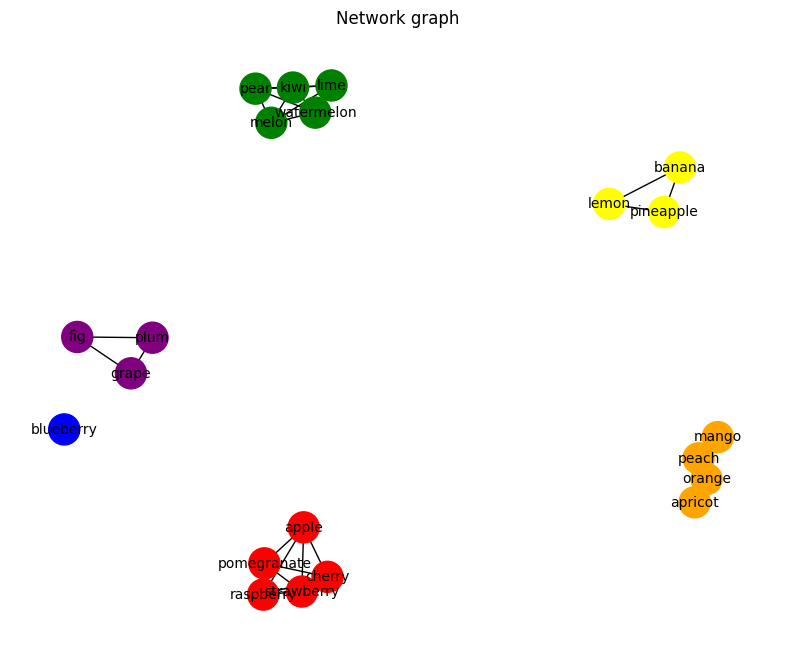

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 그래프 생성
G = nx.Graph()

# 색상을 기준으로 단어들을 그룹화
color_groups = {}
for word, color in word_colors.items():
    if color not in color_groups:
        color_groups[color] = []
    color_groups[color].append(word)

# 그룹 내에서 단어들을 추가하고 연결 생성
for words in color_groups.values():
    for i, word1 in enumerate(words):
        G.add_node(word1)
        for word2 in words[i+1:]:
            G.add_node(word2)
            G.add_edge(word1, word2)

# 그래프 시각화
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.5)
node_colors = [word_colors.get(n, 'gray') for n in G.nodes()]
nx.draw_networkx(G, pos, with_labels=True, node_size=500, font_size=10, node_color=node_colors)
plt.title('Network graph')
plt.axis('off')
plt.show()